# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb


# Load Data

In [2]:
d1 = pd.read_excel('finalsc_.xlsx')

In [3]:
d1.head()

,dstf,dste,e/b,h/b,vt/b,Fe,v/vc
0,4.715714,5.255714,2.0,1.800000,1511.715797,0.266038,0.656213
1,5.322857,5.784286,3.0,1.642857,1656.314700,0.291485,0.754905
2,5.215714,5.552857,3.5,1.800000,1511.715797,0.266038,0.656213
3,4.805714,5.328571,3.5,1.800000,1511.715797,0.266038,0.656213
4,4.944286,5.572857,3.5,2.100000,1295.756398,0.228032,0.519152


In [4]:
d2= pd.read_excel('set2.xlsx')

In [5]:
data = pd.concat([d1, d2])

In [6]:
len(data)

1007

In [7]:
# data.to_excel('combined_data.xlsx', index = False)

# Random Forest Regressor

### Load Data

In [8]:
data = pd.read_excel('combined_data.xlsx')


In [9]:
data.head()

,dstf,dste,e/b,h/b,vt/b,Fe,v/vc
0,4.715714,5.255714,2.0,1.800000,1511.715797,0.266038,0.656213
1,5.322857,5.784286,3.0,1.642857,1656.314700,0.291485,0.754905
2,5.215714,5.552857,3.5,1.800000,1511.715797,0.266038,0.656213
3,4.805714,5.328571,3.5,1.800000,1511.715797,0.266038,0.656213
4,4.944286,5.572857,3.5,2.100000,1295.756398,0.228032,0.519152


## Front

In [10]:
# Split the data into training and testing sets
X = data[['h/b', 'vt/b','Fe','v/vc']]
y = data['dstf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter space for the grid search
param_grid = {
    'n_estimators': [50,100,500],
    'max_depth': [5,10,15],
    'min_samples_split': [2,5,7],
    'min_samples_leaf': [1,2,3],
    'max_features': ['sqrt', 'log2']
}

# Train a random forest regression model with the best hyperparameters found by grid search
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = model.predict(X_test)


### Calculate losses on training data for Front

In [11]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)


Mean Squared Error: 1450.9666119279586
Mean Absolute Error: 9.283761739491746
Root Mean Squared Error: 38.09155565119333
R-squared: 0.9796289777132478


In [12]:
best_model = model

In [13]:
best_model

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=5,
                      n_estimators=50, random_state=42)

### Calculate losses on validation data for Front

In [14]:
validation_df = pd.read_excel('finalsc_.xlsx', sheet_name = 'Sheet2')

In [15]:
# Make predictions on the validation data
X = validation_df[['h/b', 'vt/b','Fe','v/vc']]
validation_predictions = model.predict(X)

# Calculate errors/loss on the validation set
mse_validation = mean_squared_error(validation_df['dstf'], validation_predictions)
mae_validation = mean_absolute_error(validation_df['dstf'], validation_predictions)
rmse_validation = mean_squared_error(validation_df['dstf'], validation_predictions, squared=False)
r2_validation = r2_score(validation_df['dstf'], validation_predictions)

print('Validation Mean Squared Error:', mse_validation)
print('Validation Mean Absolute Error:', mae_validation)
print('Validation Root Mean Squared Error:', rmse_validation)
print('Validation R-squared:', r2_validation)

Validation Mean Squared Error: 0.008191421363948856
Validation Mean Absolute Error: 0.074188050034132
Validation Root Mean Squared Error: 0.09050647139265157
Validation R-squared: 0.8235896773044963


### Plot Training Loss (RMSE) Curve for Front

Number of Estimators: 1 | Training RMSE: 8.071651
Number of Estimators: 2 | Training RMSE: 7.518935
Number of Estimators: 3 | Training RMSE: 9.570924
Number of Estimators: 4 | Training RMSE: 13.978067
Number of Estimators: 5 | Training RMSE: 13.427650
Number of Estimators: 6 | Training RMSE: 11.880998
Number of Estimators: 7 | Training RMSE: 11.739267
Number of Estimators: 8 | Training RMSE: 12.721192
Number of Estimators: 9 | Training RMSE: 11.768904
Number of Estimators: 10 | Training RMSE: 12.025371
Number of Estimators: 11 | Training RMSE: 11.325446
Number of Estimators: 12 | Training RMSE: 11.393335
Number of Estimators: 13 | Training RMSE: 11.751565
Number of Estimators: 14 | Training RMSE: 11.220356
Number of Estimators: 15 | Training RMSE: 10.781042
Number of Estimators: 16 | Training RMSE: 10.408228
Number of Estimators: 17 | Training RMSE: 11.108312
Number of Estimators: 18 | Training RMSE: 11.467444
Number of Estimators: 19 | Training RMSE: 11.103555
Number of Estimators: 20

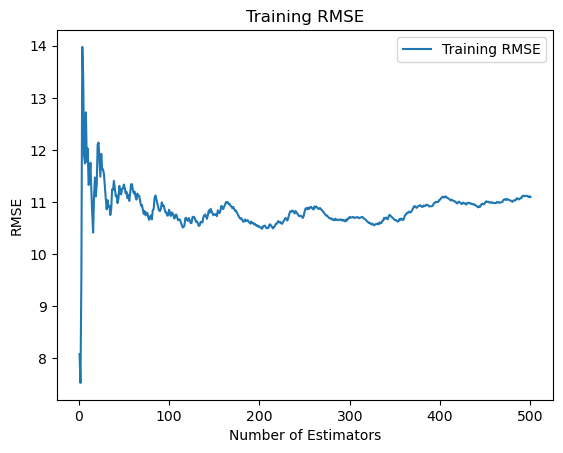

In [16]:
# Initialize lists to store training and validation RMSE
train_rmse = []
val_rmse = []

# Train the model and track RMSE
for n_estimators in range(1, 500 + 1):
    # Fit the model to the current number of estimators
    best_model.set_params(n_estimators=n_estimators)
    best_model.fit(X_train, y_train)
    
    # Predict on training data and calculate training RMSE
    y_train_pred = best_model.predict(X_train)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    
    # # Predict on validation data and calculate validation RMSE
    # y_val_pred = best_model.predict(X_test)
    # val_rmse.append(np.sqrt(mean_squared_error(y_test, y_val_pred)))
    
    # Print progress
    print(f"Number of Estimators: {n_estimators} | Training RMSE: {train_rmse[-1]:.6f}")# | Validation RMSE: {val_rmse[-1]:.6f}")

# Plot the training and validation RMSE
plt.plot(np.arange(1, len(train_rmse) + 1), train_rmse, label='Training RMSE')
# plt.plot(np.arange(1, len(val_rmse) + 1), val_rmse, label='Validation RMSE')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('Training RMSE')
plt.legend()
plt.show()

### Plot Training vs Validation loss curve (Front)

Number of Estimators: 1 | Training RMSE: 8.071651 | Validation RMSE: 35.878349
Number of Estimators: 2 | Training RMSE: 7.518935 | Validation RMSE: 35.935768
Number of Estimators: 3 | Training RMSE: 9.570924 | Validation RMSE: 35.712047
Number of Estimators: 4 | Training RMSE: 13.978067 | Validation RMSE: 38.420313
Number of Estimators: 5 | Training RMSE: 13.427650 | Validation RMSE: 38.481089
Number of Estimators: 6 | Training RMSE: 11.880998 | Validation RMSE: 37.755846
Number of Estimators: 7 | Training RMSE: 11.739267 | Validation RMSE: 37.630608
Number of Estimators: 8 | Training RMSE: 12.721192 | Validation RMSE: 38.104166
Number of Estimators: 9 | Training RMSE: 11.768904 | Validation RMSE: 37.629059
Number of Estimators: 10 | Training RMSE: 12.025371 | Validation RMSE: 38.238530
Number of Estimators: 11 | Training RMSE: 11.325446 | Validation RMSE: 37.886831
Number of Estimators: 12 | Training RMSE: 11.393335 | Validation RMSE: 37.517593
Number of Estimators: 13 | Training RMSE

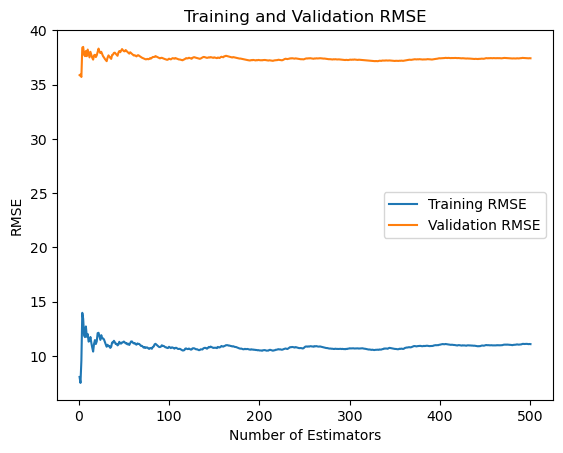

In [17]:
# Initialize lists to store training and validation RMSE
train_rmse = []
val_rmse = []

# Train the model and track RMSE
for n_estimators in range(1, 500 + 1):
    # Fit the model to the current number of estimators
    best_model.set_params(n_estimators=n_estimators)
    best_model.fit(X_train, y_train)
    
    # Predict on training data and calculate training RMSE
    y_train_pred = best_model.predict(X_train)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    
    # Predict on validation data and calculate validation RMSE
    y_val_pred = best_model.predict(X_test)
    val_rmse.append(np.sqrt(mean_squared_error(y_test, y_val_pred)))
    
    # Print progress
    print(f"Number of Estimators: {n_estimators} | Training RMSE: {train_rmse[-1]:.6f} | Validation RMSE: {val_rmse[-1]:.6f}")

# Plot the training and validation RMSE
plt.plot(np.arange(1, len(train_rmse) + 1), train_rmse, label='Training RMSE')
plt.plot(np.arange(1, len(val_rmse) + 1), val_rmse, label='Validation RMSE')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE')
plt.legend()
plt.show()

## Eccentric


In [18]:
# Load the data into a Pandas dataframe
data = pd.read_excel('finalsc_.xlsx', sheet_name = 'Sheet1')

# Split the data into training and testing sets
X = data[['dstf','e/b', 'h/b', 'vt/b','Fe','v/vc']]
y = data['dste']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter space for the grid search
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 12, 15],
    'min_samples_split': [2, 5, 7 , 10],
    'min_samples_leaf': [1, 2,3, 4]
}

# Train a random forest regression model with the best hyperparameters found by grid search
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = model.predict(X_test)



In [20]:
best_model = model

In [22]:
best_model

RandomForestRegressor(max_depth=12, min_samples_leaf=4, n_estimators=500,
                      random_state=42)

### Calculate losses on training data for Eccentric

In [23]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 0.0060713647018835765
Mean Absolute Error: 0.05548711190413972
Root Mean Squared Error: 0.07791896240250878
R-squared: 0.9292209317508298


### Calculate losses on validation data for Eccentric

In [24]:
validation_df = pd.read_excel('finalsc_.xlsx', sheet_name = 'Sheet2')

In [25]:
# Make predictions on the validation data
X = validation_df[['dstf','e/b', 'h/b', 'vt/b','Fe','v/vc']]
validation_predictions = model.predict(X)

# Calculate errors/loss on the validation set
mse_validation = mean_squared_error(validation_df['dste'], validation_predictions)
mae_validation = mean_absolute_error(validation_df['dste'], validation_predictions)
rmse_validation = mean_squared_error(validation_df['dste'], validation_predictions, squared=False)
r2_validation = r2_score(validation_df['dste'], validation_predictions)

print('Validation Mean Squared Error:', mse_validation)
print('Validation Mean Absolute Error:', mae_validation)
print('Validation Root Mean Squared Error:', rmse_validation)
print('Validation R-squared:', r2_validation)

Validation Mean Squared Error: 0.004945504730648241
Validation Mean Absolute Error: 0.050724947894609476
Validation Root Mean Squared Error: 0.07032428265292325
Validation R-squared: 0.9107898468384948


### Plot Training Loss curve for Eccentric

Number of Estimators: 1 | Training RMSE: 0.271541
Number of Estimators: 2 | Training RMSE: 0.217682
Number of Estimators: 3 | Training RMSE: 0.211504
Number of Estimators: 4 | Training RMSE: 0.202784
Number of Estimators: 5 | Training RMSE: 0.200049
Number of Estimators: 6 | Training RMSE: 0.196414
Number of Estimators: 7 | Training RMSE: 0.193610
Number of Estimators: 8 | Training RMSE: 0.189804
Number of Estimators: 9 | Training RMSE: 0.187107
Number of Estimators: 10 | Training RMSE: 0.187028
Number of Estimators: 11 | Training RMSE: 0.186162
Number of Estimators: 12 | Training RMSE: 0.188079
Number of Estimators: 13 | Training RMSE: 0.187351
Number of Estimators: 14 | Training RMSE: 0.185477
Number of Estimators: 15 | Training RMSE: 0.184256
Number of Estimators: 16 | Training RMSE: 0.183288
Number of Estimators: 17 | Training RMSE: 0.182151
Number of Estimators: 18 | Training RMSE: 0.181044
Number of Estimators: 19 | Training RMSE: 0.181185
Number of Estimators: 20 | Training RMSE

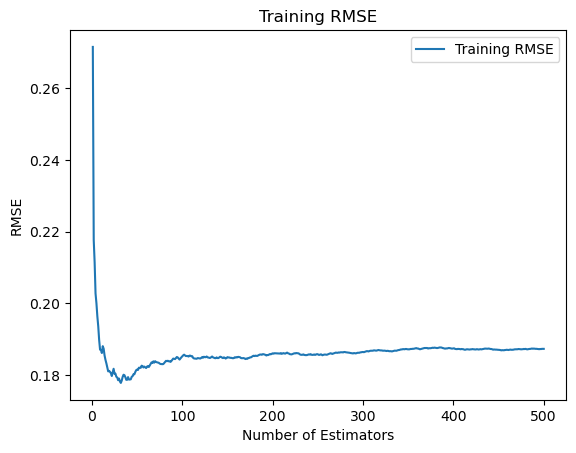

In [26]:
# Initialize lists to store training and validation RMSE
train_rmse = []
val_rmse = []

# Train the model and track RMSE
for n_estimators in range(1, 500 + 1):
    # Fit the model to the current number of estimators
    best_model.set_params(n_estimators=n_estimators)
    best_model.fit(X_train, y_train)
    
    # Predict on training data and calculate training RMSE
    y_train_pred = best_model.predict(X_train)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    
    # # Predict on validation data and calculate validation RMSE
    # y_val_pred = best_model.predict(X_test)
    # val_rmse.append(np.sqrt(mean_squared_error(y_test, y_val_pred)))
    
    # Print progress
    print(f"Number of Estimators: {n_estimators} | Training RMSE: {train_rmse[-1]:.6f}")# | Validation RMSE: {val_rmse[-1]:.6f}")

# Plot the training and validation RMSE
plt.plot(np.arange(1, len(train_rmse) + 1), train_rmse, label='Training RMSE')
# plt.plot(np.arange(1, len(val_rmse) + 1), val_rmse, label='Validation RMSE')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('Training RMSE')
plt.legend()
plt.show()

### Plot Training Loss vs Validation Loss curve for Eccentric

Number of Estimators: 1 | Training RMSE: 0.271541 | Validation RMSE: 0.285015
Number of Estimators: 2 | Training RMSE: 0.217682 | Validation RMSE: 0.152169
Number of Estimators: 3 | Training RMSE: 0.211504 | Validation RMSE: 0.109336
Number of Estimators: 4 | Training RMSE: 0.202784 | Validation RMSE: 0.111671
Number of Estimators: 5 | Training RMSE: 0.200049 | Validation RMSE: 0.136858
Number of Estimators: 6 | Training RMSE: 0.196414 | Validation RMSE: 0.116620
Number of Estimators: 7 | Training RMSE: 0.193610 | Validation RMSE: 0.107870
Number of Estimators: 8 | Training RMSE: 0.189804 | Validation RMSE: 0.098397
Number of Estimators: 9 | Training RMSE: 0.187107 | Validation RMSE: 0.109363
Number of Estimators: 10 | Training RMSE: 0.187028 | Validation RMSE: 0.100770
Number of Estimators: 11 | Training RMSE: 0.186162 | Validation RMSE: 0.095767
Number of Estimators: 12 | Training RMSE: 0.188079 | Validation RMSE: 0.090663
Number of Estimators: 13 | Training RMSE: 0.187351 | Validati

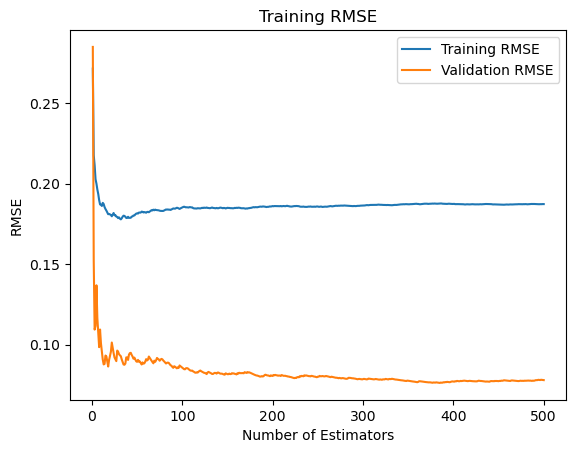

In [27]:
# Initialize lists to store training and validation RMSE
train_rmse = []
val_rmse = []

# Train the model and track RMSE
for n_estimators in range(1, 500 + 1):
    # Fit the model to the current number of estimators
    best_model.set_params(n_estimators=n_estimators)
    best_model.fit(X_train, y_train)
    
    # Predict on training data and calculate training RMSE
    y_train_pred = best_model.predict(X_train)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    
    # # Predict on validation data and calculate validation RMSE
    y_val_pred = best_model.predict(X_test)
    val_rmse.append(np.sqrt(mean_squared_error(y_test, y_val_pred)))
    
    # Print progress
    print(f"Number of Estimators: {n_estimators} | Training RMSE: {train_rmse[-1]:.6f} | Validation RMSE: {val_rmse[-1]:.6f}")

# Plot the training and validation RMSE
plt.plot(np.arange(1, len(train_rmse) + 1), train_rmse, label='Training RMSE')
plt.plot(np.arange(1, len(val_rmse) + 1), val_rmse, label='Validation RMSE')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('Training RMSE')
plt.legend()
plt.show()

# XGBoost Regressor

In [23]:
# pip install xgboost

### Load Data

In [13]:
data = pd.read_excel('combined_data.xlsx')

In [14]:
data.head()

,dstf,dste,e/b,h/b,vt/b,Fe,v/vc
0,4.715714,5.255714,2.0,1.800000,1511.715797,0.266038,0.656213
1,5.322857,5.784286,3.0,1.642857,1656.314700,0.291485,0.754905
2,5.215714,5.552857,3.5,1.800000,1511.715797,0.266038,0.656213
3,4.805714,5.328571,3.5,1.800000,1511.715797,0.266038,0.656213
4,4.944286,5.572857,3.5,2.100000,1295.756398,0.228032,0.519152


### Fronts

In [145]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[['h/b', 'vt/b','Fe','v/vc']],
    data['dstf'],
    test_size=0.1,
    random_state=42
)

# Define XGBoost regressor model and fit on training data
model = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=7,
    learning_rate=0.2,
    random_state=42
)
model.fit(X_train, y_train)
# Predict on test data and evaluate the model
y_pred = model.predict(X_test)

### Calculate losses on training data for Front

In [146]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 2442.0349004288123
Mean Absolute Error: 10.086465661508864
Root Mean Squared Error: 49.41694952573269
R-squared: 0.9649172484071552


### Calculate losses on validation data for Front

In [147]:
validation_df = pd.read_excel('finalsc_.xlsx', sheet_name = 'Sheet2')

In [148]:
# Make predictions on the validation data
X = validation_df[['h/b', 'vt/b','Fe','v/vc']]
validation_predictions = model.predict(X)

# Calculate errors/loss on the validation set
mse_validation = mean_squared_error(validation_df['dstf'], validation_predictions)
mae_validation = mean_absolute_error(validation_df['dstf'], validation_predictions)
rmse_validation = mean_squared_error(validation_df['dstf'], validation_predictions, squared=False)
r2_validation = r2_score(validation_df['dstf'], validation_predictions)

print('Validation Mean Squared Error:', mse_validation)
print('Validation Mean Absolute Error:', mae_validation)
print('Validation Root Mean Squared Error:', rmse_validation)
print('Validation R-squared:', r2_validation)

Validation Mean Squared Error: 0.005787664082043279
Validation Mean Absolute Error: 0.04612415819751955
Validation Root Mean Squared Error: 0.07607669867997217
Validation R-squared: 0.8753569566253843


### Plot Training Loss (RMSE) Curve for Front

[0]	validation_0-rmse:357.41339
[1]	validation_0-rmse:353.90700
[2]	validation_0-rmse:350.43595
[3]	validation_0-rmse:346.99986
[4]	validation_0-rmse:343.59844
[5]	validation_0-rmse:340.23132
[6]	validation_0-rmse:336.89817
[7]	validation_0-rmse:333.59866
[8]	validation_0-rmse:330.33247
[9]	validation_0-rmse:327.09929
[10]	validation_0-rmse:323.89878
[11]	validation_0-rmse:320.73063
[12]	validation_0-rmse:317.59454
[13]	validation_0-rmse:314.49018
[14]	validation_0-rmse:311.41725
[15]	validation_0-rmse:308.37547
[16]	validation_0-rmse:305.36450
[17]	validation_0-rmse:302.38406
[18]	validation_0-rmse:299.43385
[19]	validation_0-rmse:296.51361
[20]	validation_0-rmse:293.62301
[21]	validation_0-rmse:290.76179
[22]	validation_0-rmse:287.92965
[23]	validation_0-rmse:285.12634
[24]	validation_0-rmse:282.35154
[25]	validation_0-rmse:279.60501
[26]	validation_0-rmse:276.88646
[27]	validation_0-rmse:274.19563
[28]	validation_0-rmse:271.53225
[29]	validation_0-rmse:268.89607
[30]	validation_0-rm

C:\Users\shresth.mishra\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\shresth.mishra\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[84]	validation_0-rmse:159.13992
[85]	validation_0-rmse:157.66717
[86]	validation_0-rmse:156.22594
[87]	validation_0-rmse:154.79516
[88]	validation_0-rmse:153.38325
[89]	validation_0-rmse:151.97340
[90]	validation_0-rmse:150.59401
[91]	validation_0-rmse:149.22972
[92]	validation_0-rmse:147.86556
[93]	validation_0-rmse:146.52979
[94]	validation_0-rmse:145.21001
[95]	validation_0-rmse:143.89030
[96]	validation_0-rmse:142.59953
[97]	validation_0-rmse:141.31894
[98]	validation_0-rmse:140.05664
[99]	validation_0-rmse:138.80407
[100]	validation_0-rmse:137.56549
[101]	validation_0-rmse:136.34078
[102]	validation_0-rmse:135.12980
[103]	validation_0-rmse:133.93244
[104]	validation_0-rmse:132.75314
[105]	validation_0-rmse:131.58711
[106]	validation_0-rmse:130.42975
[107]	validation_0-rmse:129.28994
[108]	validation_0-rmse:128.16303
[109]	validation_0-rmse:127.04892
[110]	validation_0-rmse:125.94747
[111]	validation_0-rmse:124.85436
[112]	validation_0-rmse:123.78372
[113]	validation_0-rmse:122.71

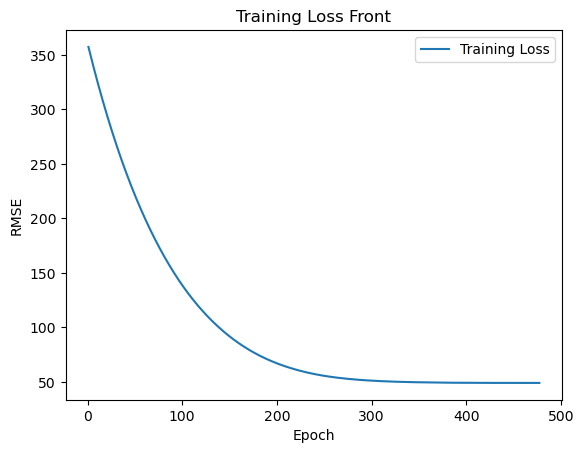

In [22]:
# Load the data into a Pandas dataframe
data = pd.read_excel('combined_data.xlsx')

# Split the data into training and testing sets
X = data[['h/b', 'vt/b', 'Fe', 'v/vc']]
y = data['dstf']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the model
model = xgb.XGBRegressor(
    n_estimators=1000,  # High number to ensure early stopping works
    max_depth=7,
    learning_rate=0.01,
    random_state=42
)

# Fit the model with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],  # Validation set for early stopping
    eval_metric='rmse',         # Use RMSE for evaluation
    verbose=True,               # Print progress
    early_stopping_rounds=10    # Stop if validation loss doesn't improve for 20 rounds
)

# Plot the training and validation loss using the built-in results
results = model.evals_result()
train_losses = results['validation_0']['rmse']
plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training Loss Front')
plt.legend()
plt.show()


### Plot Training Loss vs Validation Loss Curve for Front

[0]	validation_0-rmse:4.64802	validation_1-rmse:4.64753
[1]	validation_0-rmse:4.60182	validation_1-rmse:4.60134
[2]	validation_0-rmse:4.55608	validation_1-rmse:4.55561
[3]	validation_0-rmse:4.51080	validation_1-rmse:4.51034
[4]	validation_0-rmse:4.46598	validation_1-rmse:4.46553
[5]	validation_0-rmse:4.42160	validation_1-rmse:4.42116
[6]	validation_0-rmse:4.37767	validation_1-rmse:4.37724
[7]	validation_0-rmse:4.33418	validation_1-rmse:4.33376
[8]	validation_0-rmse:4.29112	validation_1-rmse:4.29071
[9]	validation_0-rmse:4.24850	validation_1-rmse:4.24810
[10]	validation_0-rmse:4.20630	validation_1-rmse:4.20592
[11]	validation_0-rmse:4.16453	validation_1-rmse:4.16415
[12]	validation_0-rmse:4.12317	validation_1-rmse:4.12281
[13]	validation_0-rmse:4.08223	validation_1-rmse:4.08188
[14]	validation_0-rmse:4.04170	validation_1-rmse:4.04136
[15]	validation_0-rmse:4.00158	validation_1-rmse:4.00125
[16]	validation_0-rmse:3.96186	validation_1-rmse:3.96154
[17]	validation_0-rmse:3.92254	validation

C:\Users\shresth.mishra\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\shresth.mishra\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[128]	validation_0-rmse:1.30764	validation_1-rmse:1.28979
[129]	validation_0-rmse:1.29493	validation_1-rmse:1.27715
[130]	validation_0-rmse:1.28235	validation_1-rmse:1.26446
[131]	validation_0-rmse:1.26990	validation_1-rmse:1.25200
[132]	validation_0-rmse:1.25758	validation_1-rmse:1.23947
[133]	validation_0-rmse:1.24537	validation_1-rmse:1.22729
[134]	validation_0-rmse:1.23330	validation_1-rmse:1.21526
[135]	validation_0-rmse:1.22135	validation_1-rmse:1.20317
[136]	validation_0-rmse:1.20951	validation_1-rmse:1.19135
[137]	validation_0-rmse:1.19781	validation_1-rmse:1.17969
[138]	validation_0-rmse:1.18621	validation_1-rmse:1.16800
[139]	validation_0-rmse:1.17474	validation_1-rmse:1.15658
[140]	validation_0-rmse:1.16338	validation_1-rmse:1.14503
[141]	validation_0-rmse:1.15214	validation_1-rmse:1.13381
[142]	validation_0-rmse:1.14101	validation_1-rmse:1.12273
[143]	validation_0-rmse:1.13000	validation_1-rmse:1.11163
[144]	validation_0-rmse:1.11910	validation_1-rmse:1.10078
[145]	validati

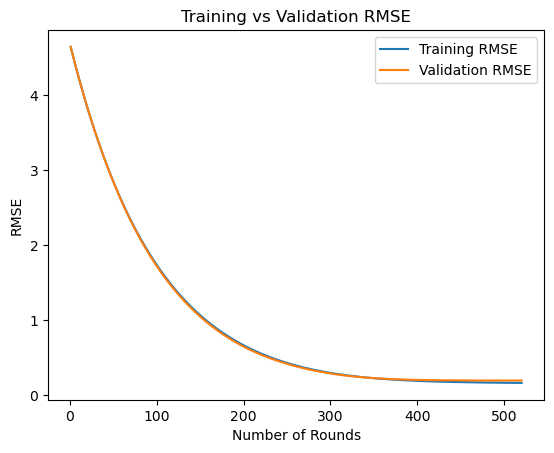

In [28]:
# Split the data into training and testing sets
X = data[['h/b', 'vt/b', 'Fe', 'v/vc']]
y = data['dstf']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the model
model = xgb.XGBRegressor(
    n_estimators=1000,  # High number to ensure early stopping works
    max_depth=7,
    learning_rate=0.01,
    random_state=42
)

# Fit the model with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Train and validation sets for early stopping
    eval_metric='rmse',         # Use RMSE for evaluation
    verbose=True,               # Print progress
    early_stopping_rounds=20    # Stop if validation loss doesn't improve for 10 rounds
)

# Get the training and validation results
results = model.evals_result()
train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']

# Plot the training and validation RMSE
plt.plot(np.arange(1, len(train_rmse) + 1), train_rmse, label='Training RMSE')
plt.plot(np.arange(1, len(val_rmse) + 1), val_rmse, label='Validation RMSE')
plt.xlabel('Number of Rounds')
plt.ylabel('RMSE')
plt.title('Training vs Validation RMSE')
plt.legend()
plt.show()


### Eccentric

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[['dstf','h/b', 'vt/b','Fe','v/vc']],
    data['dste'],
    test_size=0.1,
    random_state=42
)

# Define XGBoost regressor model and fit on training data
model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=7,
    learning_rate=0.01,
    random_state=42
)
model.fit(X_train, y_train)
# Predict on test data and evaluate the model
y_pred = model.predict(X_test)

### Calculate training losses for Eccentric

In [16]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 3512.268470726664
Mean Absolute Error: 10.673627629880356
Root Mean Squared Error: 59.264394628871926
R-squared: 0.9578175803534283


### Calculate validation losses for Eccentric

In [17]:
validation_df = pd.read_excel('finalsc_.xlsx', sheet_name = 'Sheet2')

In [19]:
# Make predictions on the validation data
X = validation_df[['dstf','h/b', 'vt/b','Fe','v/vc']]
validation_predictions = model.predict(X)

# Calculate errors/loss on the validation set
mse_validation = mean_squared_error(validation_df['dste'], validation_predictions)
mae_validation = mean_absolute_error(validation_df['dste'], validation_predictions)
rmse_validation = mean_squared_error(validation_df['dste'], validation_predictions, squared=False)
r2_validation = r2_score(validation_df['dste'], validation_predictions)

print('Validation Mean Squared Error:', mse_validation)
print('Validation Mean Absolute Error:', mae_validation)
print('Validation Root Mean Squared Error:', rmse_validation)
print('Validation R-squared:', r2_validation)

Validation Mean Squared Error: 0.0012724316250836832
Validation Mean Absolute Error: 0.028378520109216283
Validation Root Mean Squared Error: 0.03567115957021419
Validation R-squared: 0.9770470707554294


### Plot Training Loss(RMSE) Curve for Eccentric 

[0]	validation_0-rmse:357.41339
[1]	validation_0-rmse:353.90700
[2]	validation_0-rmse:350.43595
[3]	validation_0-rmse:346.99986
[4]	validation_0-rmse:343.59844
[5]	validation_0-rmse:340.23132
[6]	validation_0-rmse:336.89817
[7]	validation_0-rmse:333.59866
[8]	validation_0-rmse:330.33247
[9]	validation_0-rmse:327.09929
[10]	validation_0-rmse:323.89878
[11]	validation_0-rmse:320.73063
[12]	validation_0-rmse:317.59454
[13]	validation_0-rmse:314.49018
[14]	validation_0-rmse:311.41725
[15]	validation_0-rmse:308.37547
[16]	validation_0-rmse:305.36450
[17]	validation_0-rmse:302.38406
[18]	validation_0-rmse:299.43385
[19]	validation_0-rmse:296.51361
[20]	validation_0-rmse:293.62301
[21]	validation_0-rmse:290.76179
[22]	validation_0-rmse:287.92965
[23]	validation_0-rmse:285.12634
[24]	validation_0-rmse:282.35154
[25]	validation_0-rmse:279.60501
[26]	validation_0-rmse:276.88646
[27]	validation_0-rmse:274.19563
[28]	validation_0-rmse:271.53225
[29]	validation_0-rmse:268.89607
[30]	validation_0-rm

C:\Users\shresth.mishra\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\shresth.mishra\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[74]	validation_0-rmse:174.67757
[75]	validation_0-rmse:173.04939
[76]	validation_0-rmse:171.44118
[77]	validation_0-rmse:169.83547
[78]	validation_0-rmse:168.26150
[79]	validation_0-rmse:166.70517
[80]	validation_0-rmse:165.15046
[81]	validation_0-rmse:163.62668
[82]	validation_0-rmse:162.11934
[83]	validation_0-rmse:160.61425
[84]	validation_0-rmse:159.13992
[85]	validation_0-rmse:157.66717
[86]	validation_0-rmse:156.22594
[87]	validation_0-rmse:154.79516
[88]	validation_0-rmse:153.38325
[89]	validation_0-rmse:151.97340
[90]	validation_0-rmse:150.59401
[91]	validation_0-rmse:149.22972
[92]	validation_0-rmse:147.86556
[93]	validation_0-rmse:146.52979
[94]	validation_0-rmse:145.21001
[95]	validation_0-rmse:143.89030
[96]	validation_0-rmse:142.59953
[97]	validation_0-rmse:141.31894
[98]	validation_0-rmse:140.05664
[99]	validation_0-rmse:138.80407
[100]	validation_0-rmse:137.56549
[101]	validation_0-rmse:136.34078
[102]	validation_0-rmse:135.12980
[103]	validation_0-rmse:133.93244
[104]	

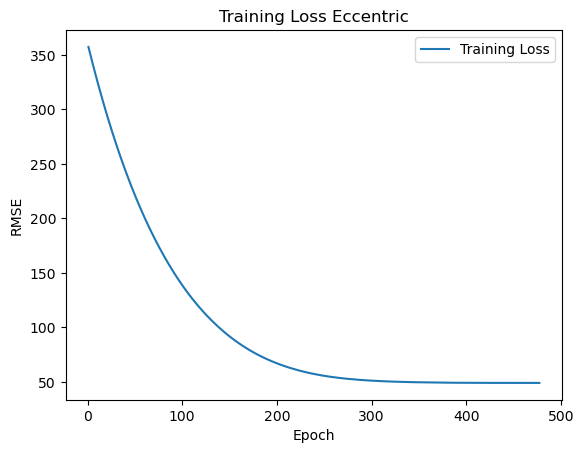

In [21]:
# Load the data into a Pandas dataframe
data = pd.read_excel('combined_data.xlsx')

# Split the data into training and testing sets
X = data[['h/b', 'vt/b', 'Fe', 'v/vc']]
y = data['dstf']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the model
model = xgb.XGBRegressor(
    n_estimators=1000,  # High number to ensure early stopping works
    max_depth=7,
    learning_rate=0.01,
    random_state=42
)

# Fit the model with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],  # Validation set for early stopping
    eval_metric='rmse',         # Use RMSE for evaluation
    verbose=True,               # Print progress
    early_stopping_rounds=10    # Stop if validation loss doesn't improve for 20 rounds
)

# Plot the training and validation loss using the built-in results
results = model.evals_result()
train_losses = results['validation_0']['rmse']
plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training Loss Eccentric')
plt.legend()
plt.show()


### Plot Training Loss vs Validation Loss Curve for Eccentric

[0]	validation_0-rmse:5.14255	validation_1-rmse:5.13189
[1]	validation_0-rmse:5.09145	validation_1-rmse:5.08077
[2]	validation_0-rmse:5.04086	validation_1-rmse:5.03017
[3]	validation_0-rmse:4.99078	validation_1-rmse:4.98007
[4]	validation_0-rmse:4.94119	validation_1-rmse:4.93047
[5]	validation_0-rmse:4.89211	validation_1-rmse:4.88137
[6]	validation_0-rmse:4.84352	validation_1-rmse:4.83276
[7]	validation_0-rmse:4.79541	validation_1-rmse:4.78463
[8]	validation_0-rmse:4.74778	validation_1-rmse:4.73699
[9]	validation_0-rmse:4.70064	validation_1-rmse:4.68983
[10]	validation_0-rmse:4.65396	validation_1-rmse:4.64313
[11]	validation_0-rmse:4.60775	validation_1-rmse:4.59691
[12]	validation_0-rmse:4.56201	validation_1-rmse:4.55115
[13]	validation_0-rmse:4.51672	validation_1-rmse:4.50584
[14]	validation_0-rmse:4.47189	validation_1-rmse:4.46099
[15]	validation_0-rmse:4.42751	validation_1-rmse:4.41659
[16]	validation_0-rmse:4.38357	validation_1-rmse:4.37264
[17]	validation_0-rmse:4.34007	validation

C:\Users\shresth.mishra\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\shresth.mishra\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[65]	validation_0-rmse:2.69315	validation_1-rmse:2.68434
[66]	validation_0-rmse:2.66660	validation_1-rmse:2.65778
[67]	validation_0-rmse:2.64032	validation_1-rmse:2.63159
[68]	validation_0-rmse:2.61430	validation_1-rmse:2.60555
[69]	validation_0-rmse:2.58855	validation_1-rmse:2.57978
[70]	validation_0-rmse:2.56305	validation_1-rmse:2.55437
[71]	validation_0-rmse:2.53781	validation_1-rmse:2.52910
[72]	validation_0-rmse:2.51283	validation_1-rmse:2.50420
[73]	validation_0-rmse:2.48809	validation_1-rmse:2.47944
[74]	validation_0-rmse:2.46361	validation_1-rmse:2.45503
[75]	validation_0-rmse:2.43937	validation_1-rmse:2.43077
[76]	validation_0-rmse:2.41537	validation_1-rmse:2.40685
[77]	validation_0-rmse:2.39162	validation_1-rmse:2.38306
[78]	validation_0-rmse:2.36810	validation_1-rmse:2.35951
[79]	validation_0-rmse:2.34482	validation_1-rmse:2.33631
[80]	validation_0-rmse:2.32178	validation_1-rmse:2.31323
[81]	validation_0-rmse:2.29897	validation_1-rmse:2.29048
[82]	validation_0-rmse:2.27638	

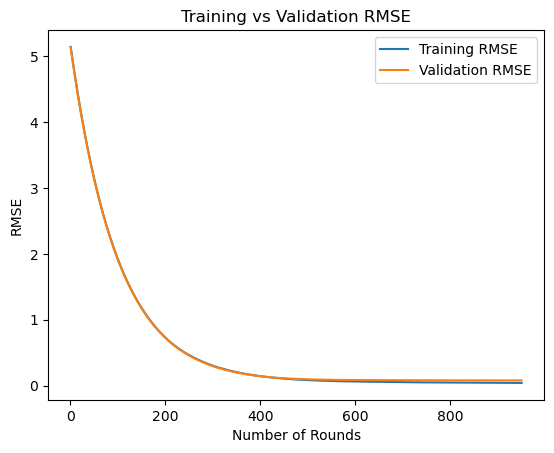

In [29]:
# Split the data into training and testing sets
X = data[['dstf','h/b', 'vt/b', 'Fe', 'v/vc']]
y = data['dste']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = xgb.XGBRegressor(
    n_estimators=1000,  # High number to ensure early stopping works
    max_depth=7,
    learning_rate=0.01,
    random_state=42
)

# Fit the model with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Train and validation sets for early stopping
    eval_metric='rmse',         # Use RMSE for evaluation
    verbose=True,               # Print progress
    early_stopping_rounds=20    # Stop if validation loss doesn't improve for 10 rounds
)

# Get the training and validation results
results = model.evals_result()
train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']

# Plot the training and validation RMSE
plt.plot(np.arange(1, len(train_rmse) + 1), train_rmse, label='Training RMSE')
plt.plot(np.arange(1, len(val_rmse) + 1), val_rmse, label='Validation RMSE')
plt.xlabel('Number of Rounds')
plt.ylabel('RMSE')
plt.title('Training vs Validation RMSE')
plt.legend()
plt.show()
